<div style="border:solid green 3px; padding: 20px">
<b>🥇 Амир, спасибо за доработки, проект принят, молодец!</b>
    
Ты провел хорошую работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

<div style="border:solid green 2px; padding: 20px">
Амир, привет! Меня зовут  и сегодня я буду делать ревью твоего проекта!
    
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание, рекомендация.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал огромную работу :)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект  лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib
import datetime #импортируем модуль datetime

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Правильно, что импортируешь все библиотеки в отдельной ячейке!  </div>

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #считываем csv файл, разделяем и присваиваем таблицу в переменную data

In [3]:
data.info() #получаем информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head() #получаем первые 5 строк таблицы для лучшего ознакомления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.tail() #получем последние 5 строк таблицы для лучшего ознакомления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


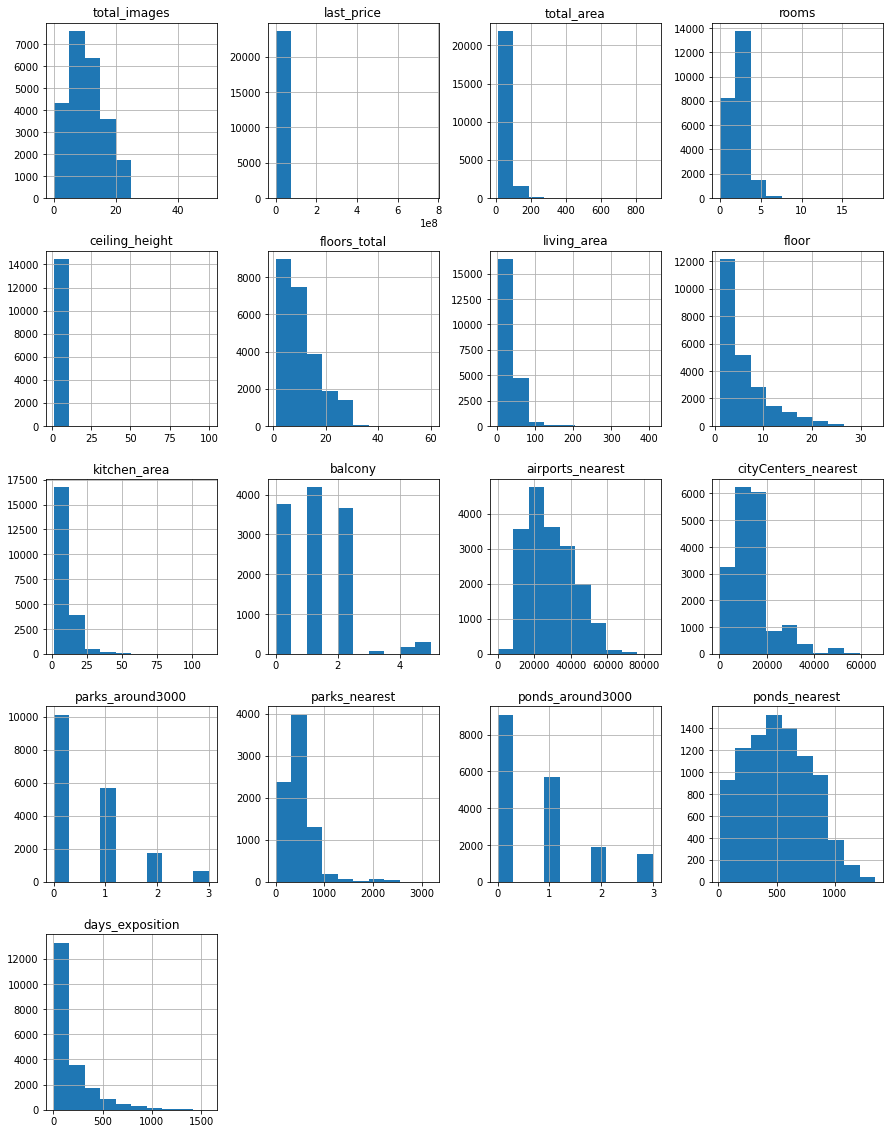

In [6]:
data.hist(figsize=(15,20)) #построение гистограмм для общего изучения данных
plt.show()

**Вывод:** познакомились с таблицей и данными в ней. Всего 21 столбец и 23699 строк. Данные в столбцах: булевого типа - 2, типа Float - 14, целочисленных - 3, строковых - 3. Также были построены гистограммы для всех числовых столбцов, что позволило узнать поглубже структуру данных в числовых столбцах.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, с данными познакомились!  </div>

### Выполните предобработку данных

In [7]:
print(data.isna().sum()) #подсчет количества пропусков в разных столбцах таблицы

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**В ходе выполнения кода выявили, что пропуски присутствуют в следующих столбцах:** 
ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition (всего в 14 столбцах). 

**Возможные причины пропусков:** ошибки в сборе данных, технические проблемы.

На высоту потолков влияет название района. Поэтому следует сгрупировать данные по районам и внести медианное значение в высоту потолка. Если человек не указал является ли недвижимость апартаментами - скорее всего не является, тоже самое с балконами - скорее всего их нет. Таким же образом следует заполнить пропуски в других параметрах
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Надеюсь что я правильно понял логику при выполнении заполнения пропусков, если нет - то совсем не понимаю как их заполнить. 
</div>

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(
data.groupby('locality_name')['ceiling_height'].transform('median')
) #заполняем медианным значением ceiling height по группировке по районам

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #дозаполняем пустые значения

In [10]:
data['balcony'] = data['balcony'].fillna(0) #заменяем пустые значения в столбце balcony на 0

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заменяем пустые значения в столбце is_apartment на false

In [12]:
data['floors_total'] = data['floors_total'].dropna(axis=0) #удаляем пустые значения в столбце floors_total

In [13]:
data['locality_name'] = data['locality_name'].dropna(axis=0) #удаляем пустые значения в столбце locality_name

In [14]:
data['airports_nearest'] = data['airports_nearest'].fillna(
data.groupby('locality_name')['airports_nearest'].transform('median')
) #заполняем медианным значением airports_nearest по группировке по районам

In [15]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(
data.groupby('locality_name')['cityCenters_nearest'].transform('median')
) #заполняем медианным значением cityCenters_nearest по группировке по районам

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 3:</b> 

Растояния до центра и аэропорта допустимо заполнить только медианой с группировкой по населенному пункту, общей медианой заполнять нельзя. Не в каждом населенном пункте есть аэропорт.

</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента3:</b> 
Вроде бы все исправил
</div>


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 

Растояния до центра и аэропорта допустимо заполнить медианой по населенному пункту, так как эти объекты у них в единственном числе или вообще отсутствуют.
    
Парков и прудов же может быть несколько, а может и не быть вообще, поэтому такое заполнение не совсем корректно. Особенно это касается столбцов с количеством прудов и парков в радиусе 3км. Обязательно ли у всех квартир в непосредственной близости должен быть и парк и пруд?

</div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента2:</b> 
Вроде бы все исправил
</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 3:</b> 

Строки с пропусками в количестве дней размещения удалять нельзя

</div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента3:</b> 
Вроде бы все исправил
</div>


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 

Строки с пропусками в площади кухни, жилой площади и количестве дней размещения удалять нельзя, они представляют собой значительный объем данных, потеря которых может привести к искажению результатов исследования. Если мы не можем заполнить пропуски достоверными значениями, то следует их оставить как есть.

</div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента2:</b> 
Вроде бы все исправил
</div>

In [16]:
print(data.isna().sum()) #подсчет количества пропусков в разных столбцах таблицы

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5394
cityCenters_nearest      5394
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Нельзя просто взять и заполнить пропуски во всех столбцах медианой. Необходимо разобрать каждый столбец отдельно. Если есть логическое обоснование возможности заполнить пропуски, то мы это делаем, если нет, то поясняем почему и оставляем пропуски как есть.

</div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Поправил все что мог
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [17]:
print(data.info()) #вызовем функцию info для data, чтобы еще раз взглянуть на тип данных в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Необходимо изменить тип данных для first_day_exposition (на форматы даты и времени), balcony (на целочисленное), days_exposition (на целочисленное).

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S') #меняем тип данных на datetime64

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Теперь у нас почти все квартиры стали апартаментами.

</div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы все поправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [19]:
# код ревьюера
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [20]:
data['balcony'] = data['balcony'].astype('int', errors='raise') #меняем тип данных на int

In [21]:
print(data.info()) #проверяем что все типы данных изменились без ошибок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [22]:
print(data['locality_name'].unique()) #проверим все уникальные значения в столбце locality_name, чтобы по-возможности убрать неявные дубликаты

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Из неявных дубликатов, что удалось найти: поселок Мурино, Мурино, поселок Бугры, посёлок городского типа Красный Бор, городской посёлок Фёдоровское. 

In [23]:
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'посёлок Мурино')  #заменяем неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('Мурино', 'посёлок Мурино')
data['locality_name'] = data['locality_name'].str.replace('поселок Бугры', 'посёлок Бугры')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа Красный Бор', 'поселок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок Фёдоровское', 'деревня Фёдоровское')


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут  можно дополнительно сравнить количество уникальных значений до обработки названий населенных пунктов и после, чтобы увидеть результат проведенной работы. </div>

**Вывод:** обработка данных была успешно проведена. В ходе предварительной обработки данных, заменили пропущенные значения, заменили неявные дубликаты, изменили тип столбцов. 

### Добавьте в таблицу новые столбцы

In [24]:
data['price_for_one_meter'] = round(data['last_price'] / data['total_area'], 2) #создаем новый столбец c ценой за 1 кв.метр.

In [25]:
data['day_of_the_week_published'] = data['first_day_exposition'].dt.dayofweek #создаем новый столбец с днем недели публикации, где понедельник - 0, вск - 6

In [26]:
data['month_published'] = data['first_day_exposition'].dt.month #создаем новый столбец с месяцем публикации

In [27]:
data['year_published'] = data['first_day_exposition'].dt.year #создаем новый столбец с годом публикации

In [28]:
def classify_floor(row):         #создадим новую таблицу floor_type с категоризованными данными об этаже
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(classify_floor, axis=1)

In [29]:
data['distance_to_center'] = round(data['cityCenters_nearest'] / 1000) #cоздание таблицы с расстоянием до центра в км

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b>
    
    
Расстояния до центра в километрах нужно округлить до целых чисел. </div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы все поправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

In [30]:
data.head() #повторный просмотр всех столбцов для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,day_of_the_week_published,month_published,year_published,floor_type,distance_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Выводить датафрейм на экран лучше в табличном виде (без использования функции `print()`), так будет гораздо понятнее и нагляднее.  </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

### Проведите исследовательский анализ данных

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Из-за наличия больших значений графики получаются очень сжатыми и реальный диапазон значений очень сложно определить, можно рассмотреть его поближе, ограничив значения на оси с помощью `plt.xlim()`. Пример привел ниже</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

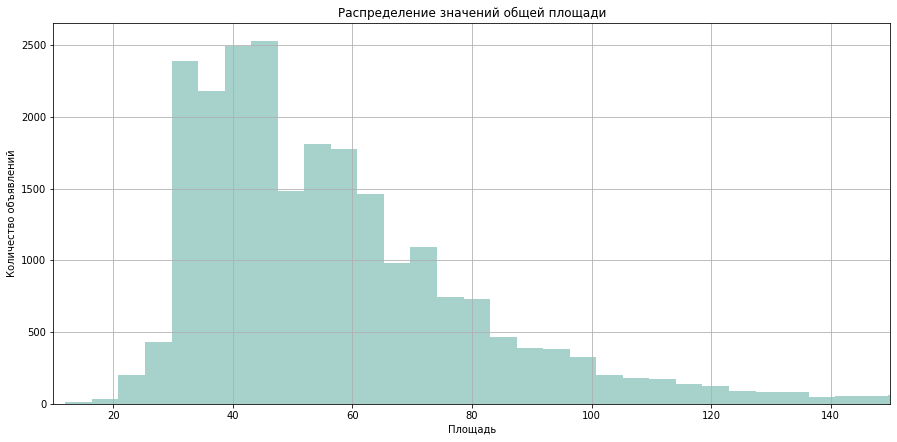

In [31]:
# код ревьюера
data.query('total_area > 15') #удаление общей площади менее 15 кв. метров (нереалистично)
data['total_area'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 150)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()
#аномалий не найдено

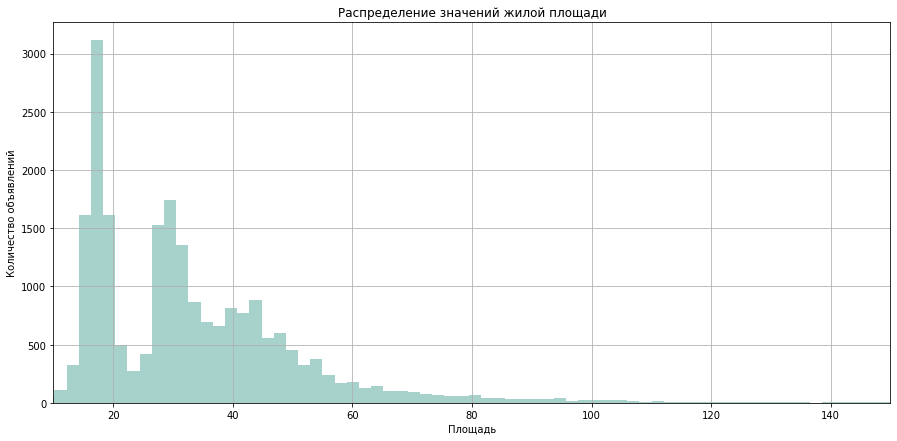

In [32]:
data.query('living_area > 10') #удаление жилой площади менее 10 кв. метров (нереалистично)
data['living_area'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 150)
plt.title('Распределение значений жилой площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()
#построение гистограммы для столбца living_area
#аномалий в гистограмме не наблюдается

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Необходимо подписывать название для каждого графика и оси на нем. Есть [хорошая статья](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/), которая подскажет как это правильно сделать). </div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы все поправил
</div>

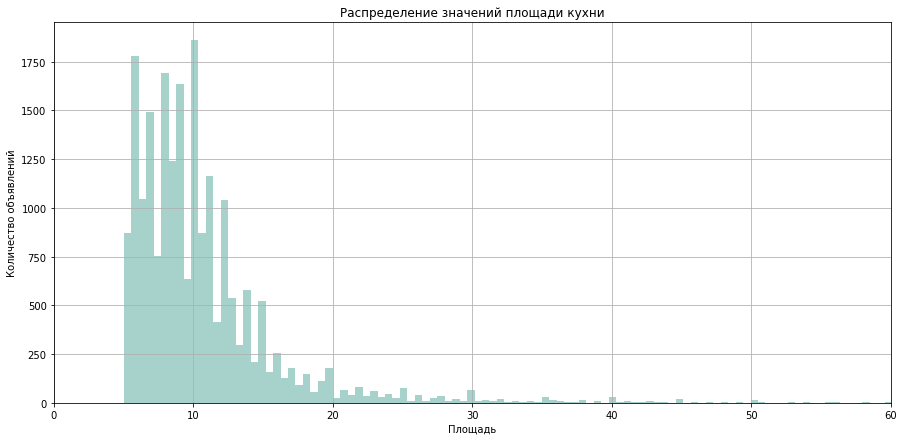

In [33]:
data = data.query('kitchen_area > 5') # удаление квартир с кухней менее 5 кв. метров (нереалистично)
data['kitchen_area'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 60)
plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается

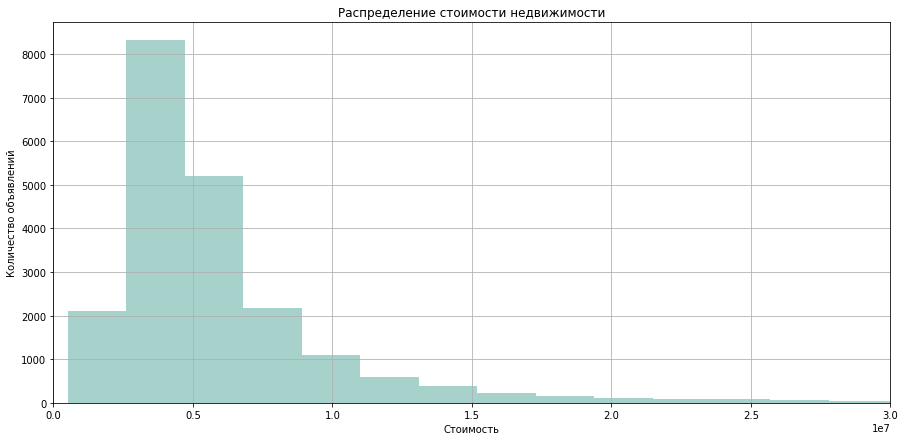

In [34]:
#есть очень дорогие квартиры (но их мало), поэтому можно задать верхний предел до 60 млн рублей и пренебречь 
#значениями дорогих квартир. 
data = data.query('last_price > 500000') #удаление квартир менее 500 тыс рублей (квартиры не могут стоить так дешево)
data['last_price'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 30000000)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость') 
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается

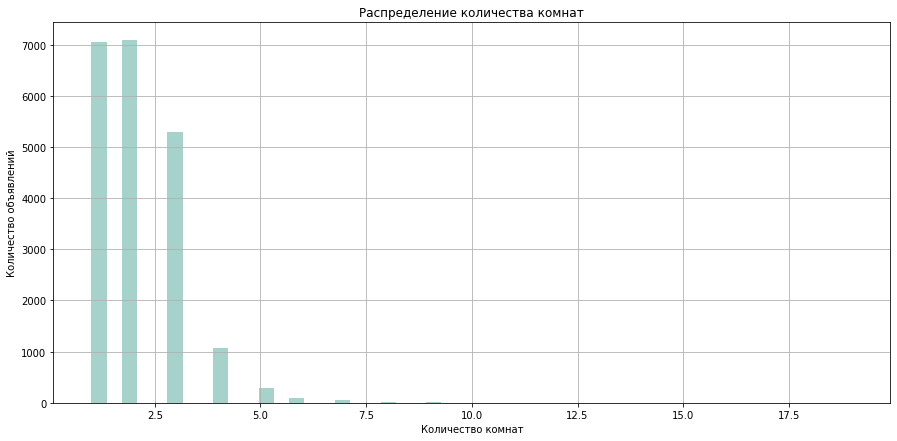

In [35]:
#аномалий не найдено
data['rooms'].hist(bins = 50, figsize = (15, 7), color='#A7D2CB')
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Для дискретных переменных лучше использовать барплот</div>

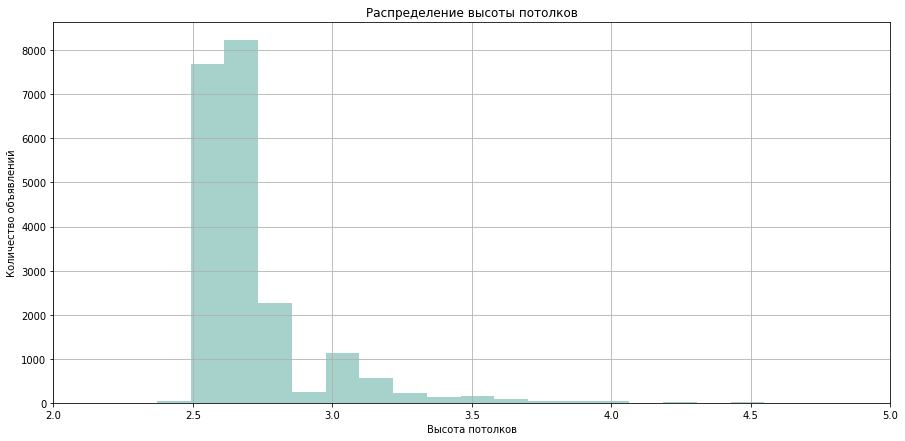

In [36]:
#построение гистограммы для столбца ceiling_height
data = data.query('ceiling_height < 10') #удаление потолков более 10 метров (нереалистично)
data = data.query('ceiling_height > 2') #удаление потолков менее 2 метров (нереалистично)
data['ceiling_height'].hist(bins = 50, figsize = (15, 7), color='#A7D2CB')
plt.xlim(2, 5)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b>
    
    
 - Следует рассматривать и аномально низкие значения тоже.
 - Визуализация получилась совсем неинформативной. По такому "распределению" сложно сделать какие-либо выводы.</div>
 <div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы все поправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

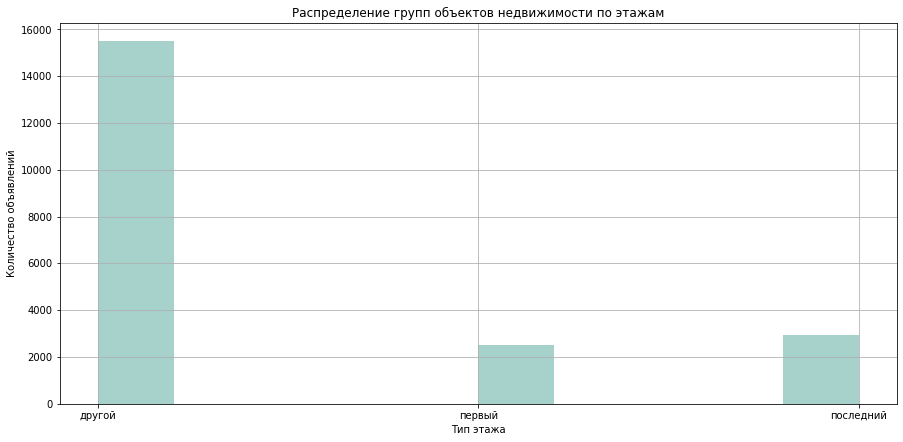

In [37]:
#построение гистограммы для столбца floor_type

data['floor_type'].hist(figsize = (15, 7), color='#A7D2CB')
plt.title('Распределение групп объектов недвижимости по этажам')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается
#аномалий не найдено

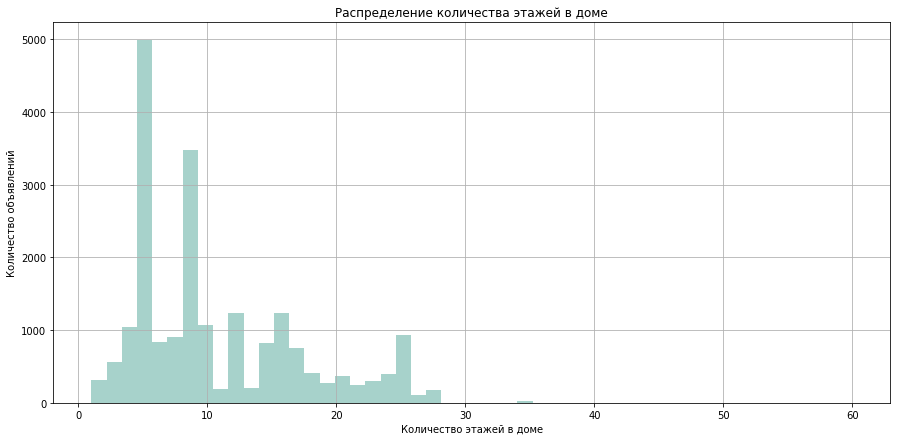

In [38]:
#построение гистограммы для столбца floors_total
data.query('floors_total > 5') #удаление нереалистичных показателей общего количества этажей (менее 5)
data['floors_total'].hist(bins = 50, figsize = (15, 7), color='#A7D2CB')
plt.title('Распределение количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается

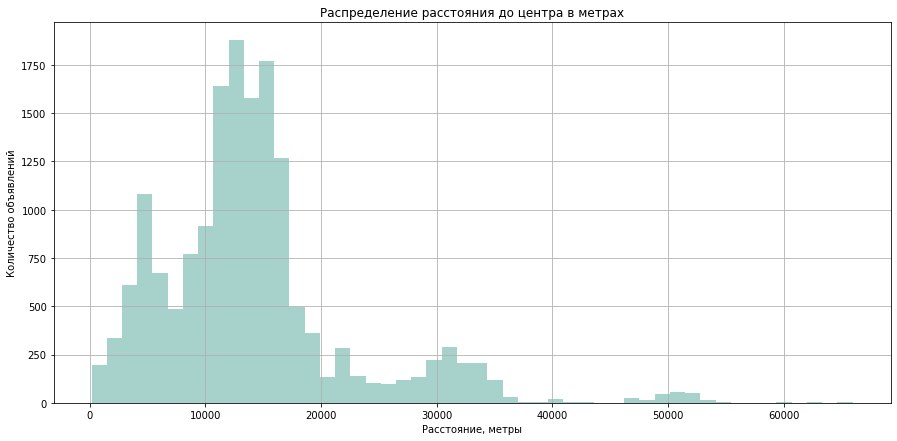

In [39]:
#построение гистограммы для столбца cityCenters_nearest
data['cityCenters_nearest'].hist(bins = 50, figsize = (15, 7), color='#A7D2CB')
plt.title('Распределение расстояния до центра в метрах')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается

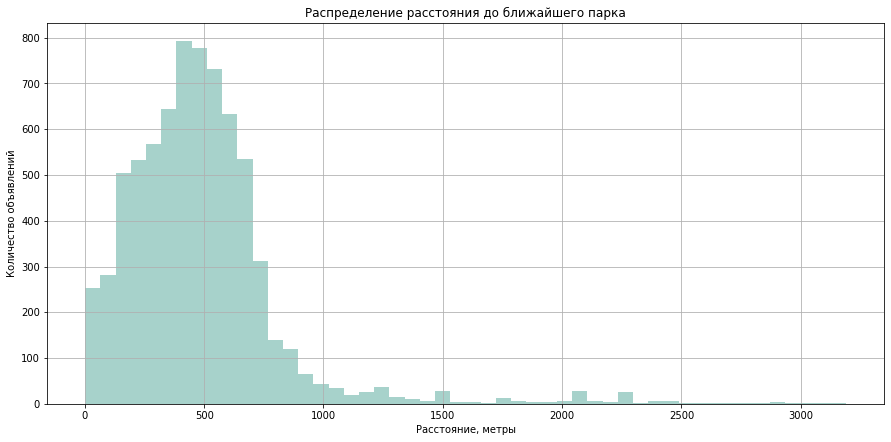

In [40]:
#построение гистограммы для столбца parks_nearest
data['parks_nearest'].hist(bins = 50, figsize = (15, 7), color='#A7D2CB')
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние, метры')
plt.ylabel('Количество объявлений')
plt.show()
#аномалий в гистограмме не наблюдается

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
Видим результаты некорректного заполнения пропусков

</div>
 <div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы все поправил
</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 3:</b> 

В расстояниях до центра все еще видим пик, образованный в результате заполнения пропусков общей медианой

</div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента 3:</b> 
Вроде бы все поправил, но пик все равно виднеется. 
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

**Вывод:** Построили гистограммы и проверили данные на аномальные значения по таким параметрам, как:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего парка.

Исправили значения, которые явно ошибочны/не допустимы для конкретных параметров.

Из самых многочисленных квартир - одна, дву и трех-комнатные квартиры с общей площадью менее 100 кв. метров, жилой площадью менее 50 кв. метров, площадью кухни менее 10 кв. метров и с ценой до 10 млн. рублей.

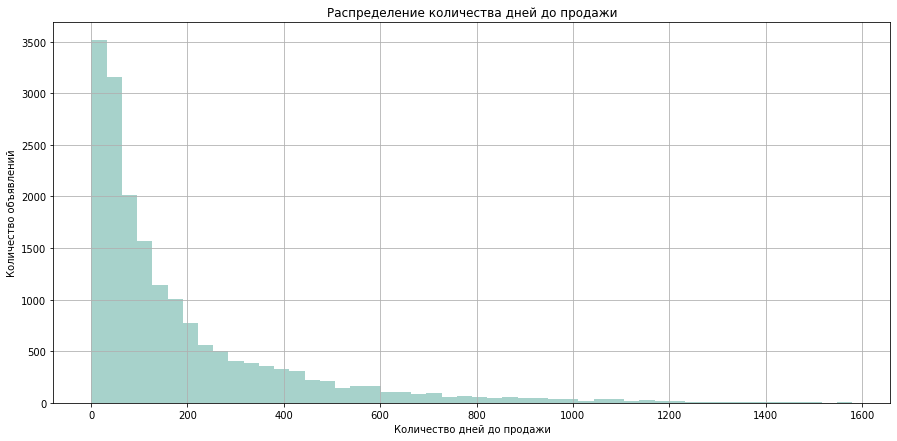

count    18009.000000
mean       185.683492
std        222.411208
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [41]:
data['days_exposition'].hist(bins = 50, figsize = (15, 7), color='#A7D2CB')
plt.title('Распределение количества дней до продажи')
plt.xlabel('Количество дней до продажи')
plt.ylabel('Количество объявлений')
plt.show()
data['days_exposition'].describe()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

В качестве дополнительного инструмента для анализа можно использовать `describe()`</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

**Вывод:** График похож на распределение Пуассона (что указывает на достоверность данных). Из гистограммы, среднего и медианного значения можно сделать вывод что 50% всех квартир обычно продается за 95 дней. Большая часть квартир продается за первые 200 дней. Также была выявлена отрицательная (заметная) корреляция между длительностью размещения объявления и годом публикации. Так как для других параметров корреляция очень слабая, делать выводы о быстрых или медленных продажах с учетом параметров квартир не логично. 
Продажи можно считать быстрыми до 45 дней, необычно долгими - после 239 дней.


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

При ответе на вопрос о быстрых и долгих продажах лучше обратить внимание на 25 и 75 квартили. </div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b>
    
    
Какие продажи можно считать быстрыми, а какие — необычно долгими? </div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы ответил выше
</div>


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

Чтобы посмотреть насколько сильно влияют те или иные параметры на общую(полную) стоимость объекта, следует взглянуть на таблицу коэффицентов Пирсона для столбца last_price. Видны заметные зависимости для общей площади, жилой площади, площади кухни. А также выявлена зависимость для количества комнат (хоть и более слабая, чем для первых параметров). На полную стоимость объекта практически никак не оказывают ни этаж, ни дата размещения публикации. Поэтому следует вывести только график для общей площади, жилой площади, площади кухни.

In [42]:
data.corr() #выведем для всех столбцов график корреляции Пирсона, который поможет нам узнать взаимосвязь двух величин (столбцов)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_one_meter,day_of_the_week_published,month_published,year_published,distance_to_center
total_images,1.000000,0.109811,0.110470,0.092973,0.048481,0.013440,0.098480,0.033518,0.011489,NaN,...,0.022470,-0.008238,-0.010496,0.001095,-0.036525,0.136205,-0.010032,0.005190,0.153908,-0.048382
last_price,0.109811,1.000000,0.697196,0.392059,0.326003,-0.005897,0.602990,0.028808,0.037321,NaN,...,0.161846,-0.016830,0.173756,-0.101716,0.087770,0.739539,-0.006180,-0.001548,-0.041502,-0.226760
total_area,0.110470,0.697196,1.000000,0.766680,0.388466,-0.070302,0.939828,-0.019963,0.032862,NaN,...,0.162449,-0.020810,0.170055,-0.105390,0.143000,0.304814,-0.008287,0.003000,-0.078801,-0.233224
rooms,0.092973,0.392059,0.766680,1.000000,0.243579,-0.217164,0.851280,-0.142984,-0.004788,NaN,...,0.134997,-0.050160,0.099645,-0.060423,0.123436,0.057630,-0.003534,-0.003672,-0.054956,-0.193405
ceiling_height,0.048481,0.326003,0.388466,0.243579,1.000000,-0.051301,0.370760,-0.022461,0.060147,NaN,...,0.224117,-0.050522,0.185984,-0.112149,0.106024,0.321076,-0.018019,0.001383,-0.062294,-0.334777
floors_total,0.013440,-0.005897,-0.070302,-0.217164,-0.051301,1.000000,-0.167407,0.674756,-0.012844,NaN,...,-0.247603,0.095450,-0.123741,0.043533,-0.053563,0.148903,0.007860,0.016395,0.013591,0.027269
living_area,0.098480,0.602990,0.939828,0.851280,0.370760,-0.167407,1.000000,-0.095437,0.027319,NaN,...,0.183697,-0.049252,0.152390,-0.085036,0.139194,0.217462,-0.006993,-0.000676,-0.071954,-0.231341
floor,0.033518,0.028808,-0.019963,-0.142984,-0.022461,0.674756,-0.095437,1.000000,-0.001073,NaN,...,-0.160654,0.071813,-0.075923,0.028607,-0.039081,0.129599,0.008466,0.020141,0.009260,0.013303
is_apartment,0.011489,0.037321,0.032862,-0.004788,0.060147,-0.012844,0.027319,-0.001073,1.000000,NaN,...,0.012832,-0.027326,0.018181,0.008572,0.033942,0.047295,-0.003603,0.008564,-0.006111,-0.004679
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='total_area', ylabel='last_price'>

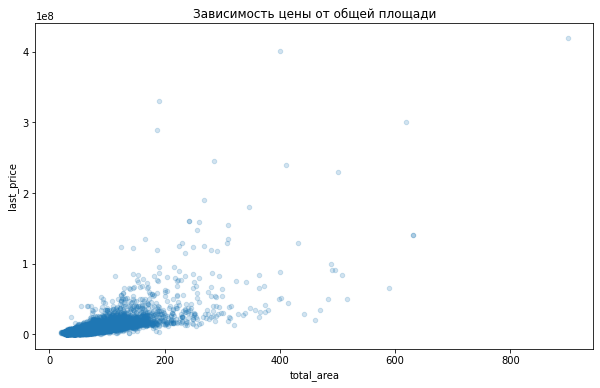

In [43]:
#построим графики для визуализации данных и зависимости параметров от цены
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2, figsize=(10, 6), title='Зависимость цены от общей площади')

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

Так как мы анализируем зависимость цены, то ее следует расположить по оси `Y`</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='living_area', ylabel='last_price'>

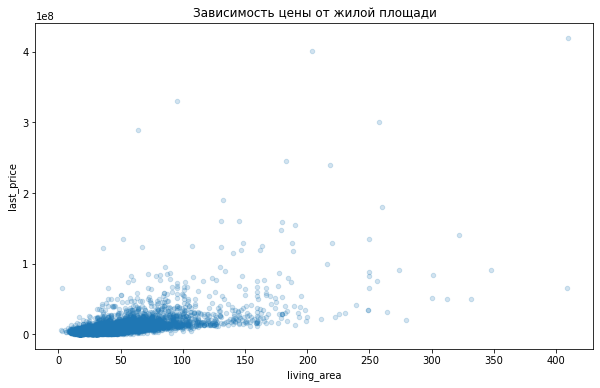

In [44]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2, figsize=(10, 6), title='Зависимость цены от жилой площади')

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='kitchen_area', ylabel='last_price'>

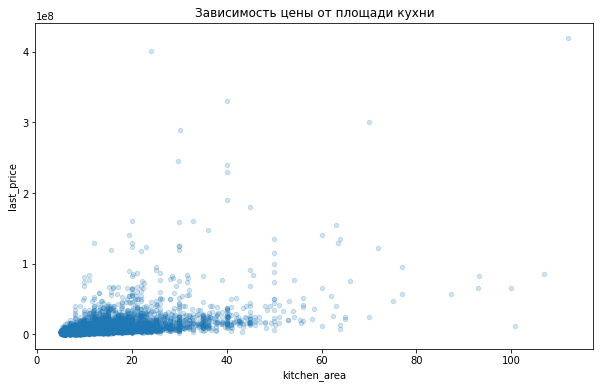

In [45]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2, figsize=(10, 6), title='Зависимость цены от площади кухни')

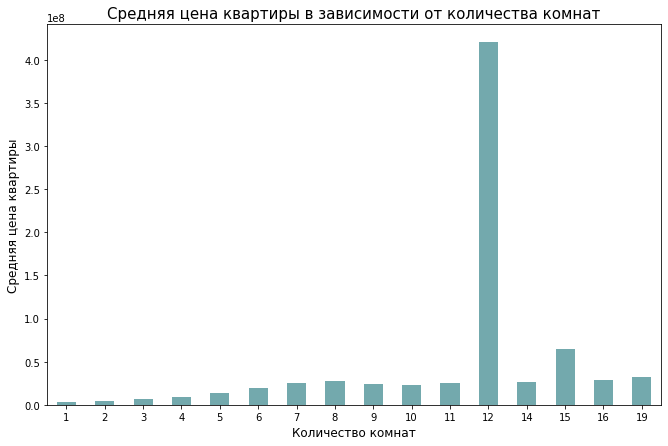

In [46]:
data.groupby('rooms')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от количества комнат', size=15)
plt.xlabel('Количество комнат', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

При ограниченном количестве значений метрик (категориальные и дискретные переменные), таких как количество комнат, категория этажа, а также день, месяц и год размещения объявления, лучше использовать barplot, предварительно рассчитав среднюю цену с группировкой по нужной метрике. Так зависимости будут гораздо нагляднее. Пример написал ниже. </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Спасибо большое за подсказку, так, действительно, нагляднее!
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

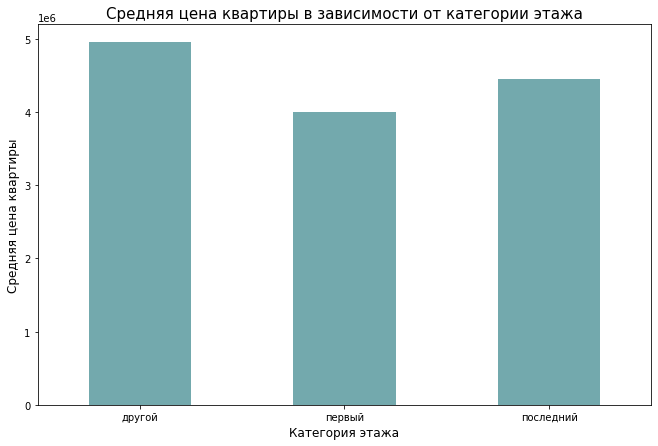

In [47]:
# код ревьюера

data.groupby('floor_type')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от категории этажа', size=15)
plt.xlabel('Категория этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

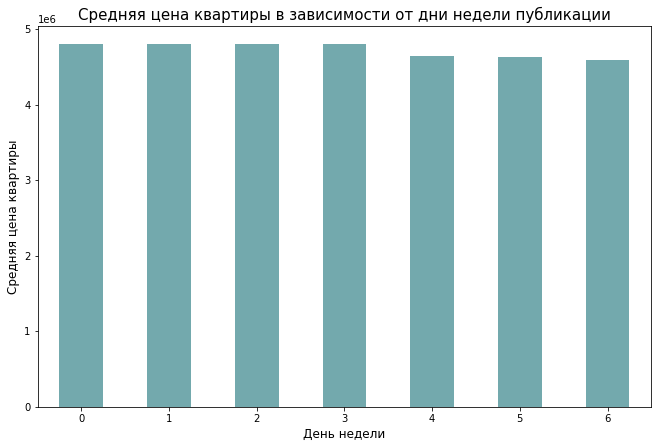

In [48]:
data.groupby('day_of_the_week_published')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от дни недели публикации', size=15)
plt.xlabel('День недели', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

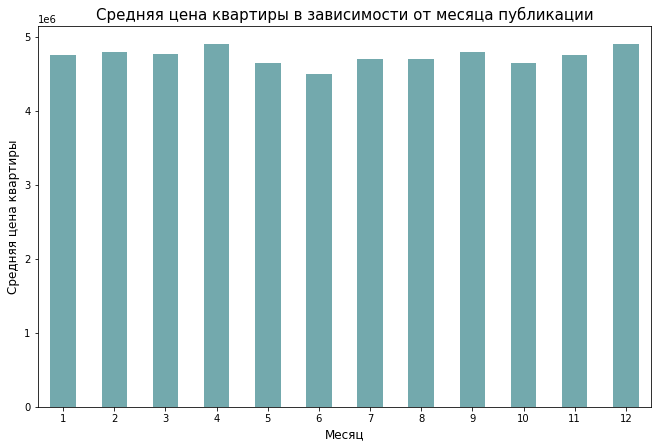

In [49]:
data.groupby('month_published')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от месяца публикации', size=15)
plt.xlabel('Месяц', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

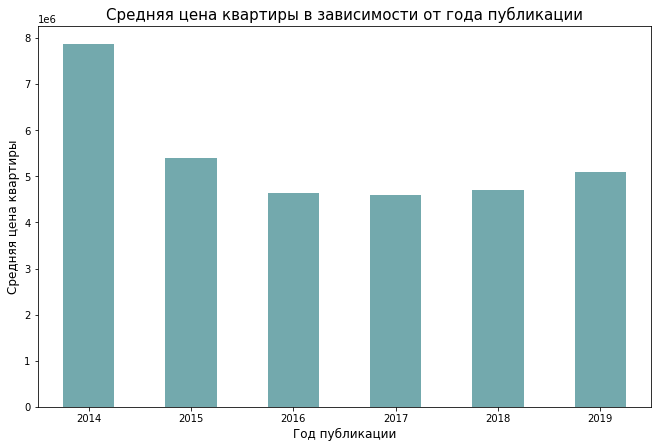

In [50]:
data.groupby('year_published')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от года публикации', size=15)
plt.xlabel('Год публикации', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

**Вывод:** на стоимость значительно оказывают влияние три параметра общая площадь, жилая площадь и площадь кухни. Чем меньше площади, тем меньше цена, и, наоборот, чем больше количество комнат, тем цена выше. Этаж и дата размещения не сильно/не оказывает влияние на цену недвижимости, за исключением года публикации. В целом имеется тенденция к снижению стоимости недвижимости с 2014 года.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 3:</b> 
    
Нам нужно проанализировать зависимость цены от дня недели, месяца и года размещения объявления отдельно друг от друга.
</div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента 3:</b> 
Сделано
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

Не забывай подписывать названия для графиков и оси</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b>
    
    
Задание по данному пункту необходимо выполнить. Если у тебя возникают сложности, то ты всегда можешь обратиться к преподавателю. </div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы ответил выше
</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
А еще нам нужно изучить зависимость цены от количества комнат, этажа, на котором расположена квартира (первый, последний, другой) и даты размещения (день недели, месяц, год).</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента 2:</b> 
Вроде бы все исправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

In [51]:
data_price_for_meter = data.pivot_table(index='locality_name' , values='price_for_one_meter', aggfunc=['mean', 'count']) #создаем сводную таблицу для количества объявлений и средней ценой квадратного метра для населенных пунктов. 

In [52]:
data_price_for_meter.columns = ['mean_price_metr', 'number_announcements'] #переименовываем столбцы

In [53]:
data_price_for_meter = data_price_for_meter.sort_values('number_announcements', ascending=False) #упорядывачиваем населённые пункты с наибольшим числом объявлений

In [54]:
data_price_for_meter.head(10) #выводим 10 населённых пунктов с наибольшим числом объявлений

,mean_price_metr,number_announcements
locality_name,,
Санкт-Петербург,114247.148370,14137
посёлок посёлок Мурино,85067.872426,441
посёлок Шушары,78516.430256,390
Всеволожск,69161.351870,353
Колпино,75290.051182,313
Пушкин,104179.608000,310
посёлок Парголово,90584.615486,288
Гатчина,69156.237378,267
деревня Кудрово,92096.754000,230


**Вывод:** Самой низкой стоимостью за кв. метр среди 10 населенных пунктов с наибольшим числом объявлений обладает Выборг. Самой высокой - Санкт-Петербург.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Все так</div>

In [55]:
new_data = data.query('locality_name == "Санкт-Петербург"') #выделяем в новый датафрейм квартиры в Санкт-Петербурге

In [56]:
new_data2 = new_data.pivot_table(index='distance_to_center', values='last_price', aggfunc='mean') #создаем сводную таблицу со средней стоимостью жилья в зависимости от расстояния до центра в км.

<AxesSubplot:xlabel='distance_to_center'>

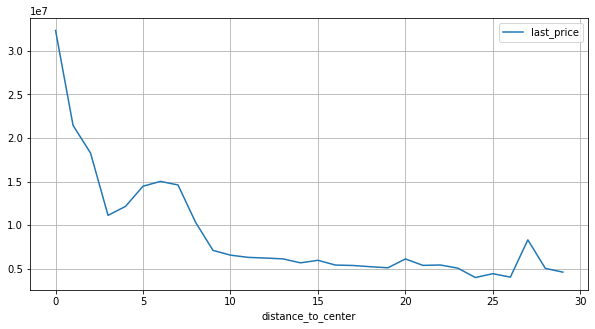

In [57]:
new_data2.plot(figsize=(10, 5), grid=True)

In [58]:
new_data2.head() #посмотрим среднюю стоимость квартир за удаление от центра по км. 

,last_price
distance_to_center,
0.0,3.235100e+07
1.0,2.144860e+07
2.0,1.826903e+07
3.0,1.111686e+07
4.0,1.214770e+07


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b>
    
    
График получился неинформативным, так как расстояния до центра в километрах не были округлены до целых чисел. </div>
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Вроде бы все поправил
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

**Вывод:** Чем удаленее недвижимость от центра Санкт-Петербурга, тем стоимость квартир ниже. Средняя цена квартир в удалении от центра 1 км - 20 млн, 2км - 18 млн, 3 км - 11 млн.

### Напишите общий вывод

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Необходимо написать итоговый вывод, он должен содержать в себе краткую информацию о том, какая работа была проделана и какие результаты получены **по всем пунктам исследования**.
    
Можно дополнительно описать основные характеристики "среднестатистической" квартиры из объявления.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

**Итоговый вывод:** в ходе выполнения проекта, успешно ознакомился с данными, обработал их и получить наглядные и информативные результаты после исследования данных.

Самая часто встречаемая квартиры - одна, дву и трех-комнатные квартиры с общей площадью менее 100 кв. метров, жилой площадью менее 50 кв. метров, площадью кухни менее 10 кв. метров и с ценой до 10 млн. рублей.

Доказано, что на стоимость значительно оказывает влияние удаленость недвижимости от центра города Санкт-Петербург, а самой низкой стоимостью за кв. метр среди 10 населенных пунктов с наибольшим числом объявлений обладает Выборг. Также на стоимость сильно оказывает влияние такие показатели, как общая площадь, жилая площадь и площадь кухни.
Было также обнаружено, что имеется тенденция к общему удешевлению недвижимости по сравнению с 2014 годом.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.